# Supervied Learning III

## SVM

svm : 여러 클래스 사이에서 margin을 최대로 분리하는 선형적 함수를 찾음. 
soft margin classification : 데이터를 선형적으로 분리 할 수 없는 경우에 사용. 제약조건을 완화하고 일부 slack variance에 대해서 penalty 적용
kernal Method : 데이터의 선형 분리가 아주 어려운 경우에 사용. -> slack variable을 사용해도 경계를 나눌 수 없음. => 더 높은 차원의 공간으로 투영하여 선형 분리를 진행한다. 
Decision Tree : 트리 형태로 예측 모델을 표현. 의사결정 규칙을 학습하여 대상 변수를 찾아감. 이해하기 쉬우며 시각화에 용이 하지만, 데이터의 overfitting이 쉽게 나타날 수 있음. 


In [31]:
import pandas as pd
import pydotplus
import numpy as np
import graphviz 
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [32]:
#! pip install --upgrade scikit-learn==0.22

In [33]:
titanic_data=pd.read_csv("data/passenger_data_set.csv")
titanic_data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [34]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [35]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
titanic_data["Sex"] = titanic_data["Sex"].astype('category').cat.codes
titanic_data["Embarked"] = titanic_data["Embarked"].astype('category').cat.codes
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex               int8
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked          int8
dtype: object

In [37]:
mean_value=titanic_data['Age'].mean()
titanic_data['Age']=titanic_data['Age'].fillna(mean_value)
titanic_data[['Cabin']]=np.where(titanic_data[['Cabin']].isnull(), 0, 1)

In [48]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [49]:
target = 'Survived'
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
y = titanic_data[target]
print(X, y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked
0         3    1  22.000000      1      0   7.2500      0         2
1         1    0  38.000000      1      0  71.2833      1         0
2         3    0  26.000000      0      0   7.9250      0         2
3         1    0  35.000000      1      0  53.1000      1         2
4         3    1  35.000000      0      0   8.0500      0         2
..      ...  ...        ...    ...    ...      ...    ...       ...
886       2    1  27.000000      0      0  13.0000      0         2
887       1    0  19.000000      0      0  30.0000      1         2
888       3    0  29.699118      1      2  23.4500      0         2
889       1    1  26.000000      0      0  30.0000      1         0
890       3    1  32.000000      0      0   7.7500      0         1

[891 rows x 8 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y,test_size=0.90,random_state=100, stratify=y)

In [42]:
clf_svm=svm.SVC(kernel='linear', C=1)
clf_svm

SVC(C=1, kernel='linear')

In [46]:
clf_svm.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [47]:
clf_svm.score(X_test, y_test)

0.7967581047381546

## Decision Tree

In [50]:
import pandas as pd
import pydotplus
import numpy as np
import graphviz 
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [51]:
titanic_data=pd.read_csv("data/passenger_data_set.csv")
titanic_data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [52]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [53]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
titanic_data['Sex'] = titanic_data['Sex'].astype('category').cat.codes
titanic_data['Embarked'] = titanic_data['Embarked'].astype('category').cat.codes
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex               int8
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked          int8
dtype: object

In [55]:
mean_value=titanic_data['Age'].mean()
titanic_data['Age']=titanic_data['Age'].fillna(mean_value)
titanic_data[['Cabin']]=np.where(titanic_data[['Cabin']].isnull(), 0, 1)

In [56]:
target = 'Survived'
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
y = titanic_data[target]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y,test_size=0.90,random_state=100, stratify=y)

In [58]:
clf_tree = tree.DecisionTreeClassifier()

In [59]:
clf_tree = clf_tree.fit(X_train, y_train)

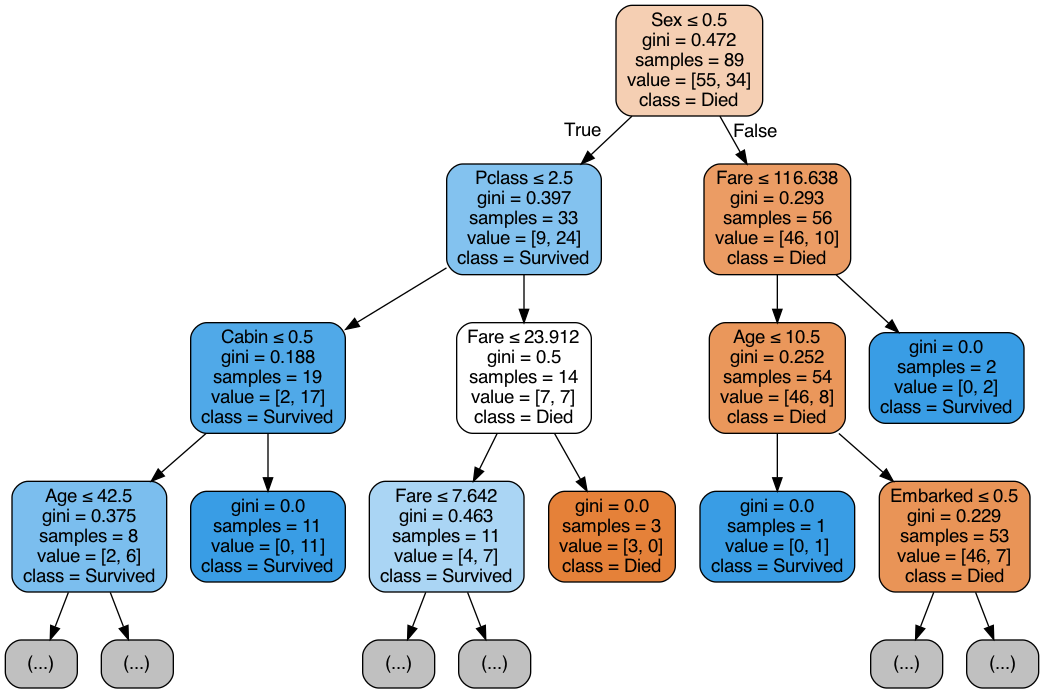

In [65]:
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                class_names=['Died','Survived'],max_depth = 3,
                special_characters=True,feature_names=X.columns.values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [63]:
clf_tree.score(X_test, y_test)

0.7394014962593516